# Enigme - La Bibliothèque Quantique

In [22]:
import numpy as np
from qiskit import *

### Les 4 grimoires peuvent être représenté par 2 qubits qui passent en superposition (porte de Hadamard)
#### 4 combinaison possible donc : 00, 01, 10, 11 (avec une probabilité de mesure à 1/4 pour chaque combinaison)
* Grimoire 0 est représenté par 00
* Grimoire 1 est représenté par 01
* Grimoire 2 est représenté par 10
* Grimoire 3 est représenté par 11

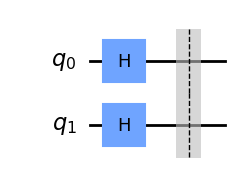

In [23]:
circ0 = QuantumCircuit(2)
circ0.draw('mpl')
circ0.h([0,1])
circ0.barrier()
circ0.draw('mpl')

## L'oracle

#### Cas 1 : Grimoire 0 est le bon grimoire : l'oracle inverse la phase quantique de grimoire 0 (00)

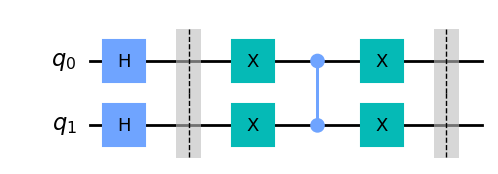

In [24]:
circ0.x([0,1])
circ0.cz(0,1) # l'inversement de phase si q0 et q1 égal 1
circ0.x([0,1])
circ0.barrier()
circ0.draw('mpl')

#### Cas 2 : Grimoire 1 est le bon grimoire : l'oracle inverse la phase quantique de grimoire 1 (10)

In [25]:
circ1 = QuantumCircuit(2)
circ1.h([0,1])
circ1.barrier()

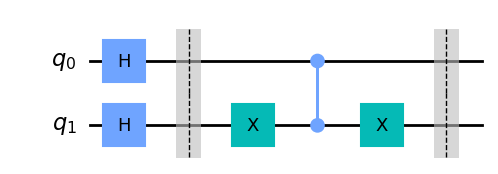

In [26]:
circ1.x(1)
circ1.cz(0,1) # l'inversement de phase si q0 et q1 égal 1
circ1.x(1)
circ1.barrier()
circ1.draw('mpl')

#### Cas 3 : Grimoire 2 est le bon grimoire : l'oracle inverse la phase quantique de grimoire 2 (01)

In [27]:
circ2 = QuantumCircuit(2)
circ2.h([0,1])
circ2.barrier()

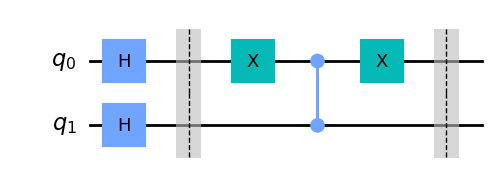

In [28]:
circ2.x(0)
circ2.cz(0,1) # l'inversement de phase si q0 et q1 égal 1
circ2.x(0)
circ2.barrier()
circ2.draw('mpl')

#### Cas 4 : Grimoire 3 est le bon grimoire : l'oracle inverse la phase quantique de grimoire 3 (11)

In [29]:
circ3 = QuantumCircuit(2)
circ3.h([0,1])
circ3.barrier()

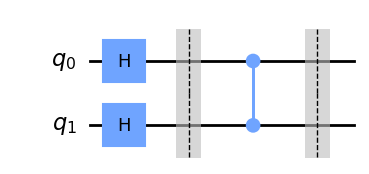

In [30]:
circ3.cz(0,1) # l'inversement de phase si q0 et q1 égal 1
circ3.barrier()
circ3.draw('mpl')

## Le diffuseur

In [31]:
circ0.h([0,1])
circ1.h([0,1])
circ2.h([0,1])
circ3.h([0,1])

circ0.z([0,1])
circ1.z([0,1])
circ2.z([0,1])  
circ3.z([0,1])

circ0.cz(0,1)
circ1.cz(0,1)
circ2.cz(0,1)
circ3.cz(0,1)

circ0.h([0,1])
circ1.h([0,1])
circ2.h([0,1])
circ3.h([0,1])

circ0.measure_all()
circ1.measure_all()
circ2.measure_all()
circ3.measure_all()

### On veut trouver Grimoire 0 (00)

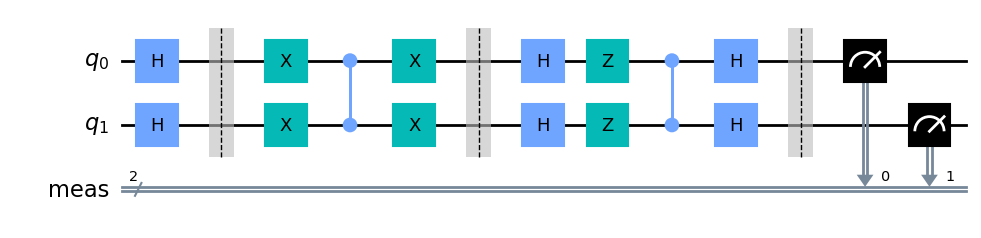

In [32]:
circ0.draw('mpl')

### On veut trouver Grimoire 1 (10)

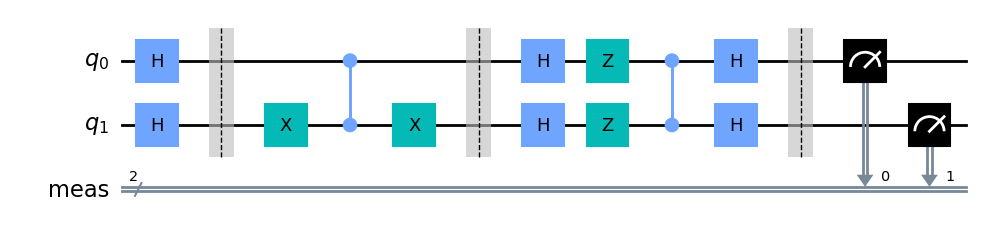

In [33]:
circ1.draw('mpl')

### On veut trouver Grimoire 2 (01)

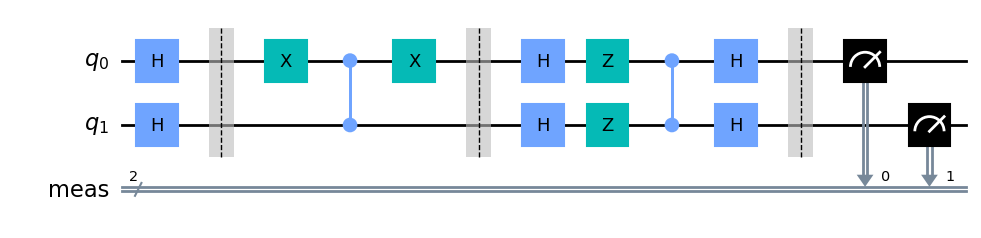

In [34]:
circ2.draw('mpl')

### On veut trouver Grimoire 3 (11)

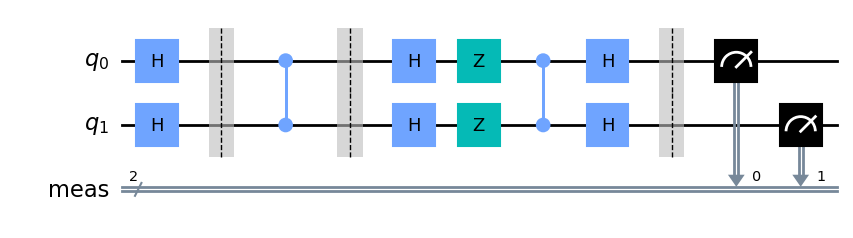

In [35]:
circ3.draw('mpl')

In [36]:
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

simulator = AerSimulator()

In [37]:
compiled_circ0 = transpile(circ0, simulator)
compiled_circ1 = transpile(circ1, simulator)
compiled_circ2 = transpile(circ2, simulator)
compiled_circ3 = transpile(circ3, simulator)

result0 = simulator.run(compiled_circ0, shots=10000).result()
result1 = simulator.run(compiled_circ1, shots=10000).result()
result2 = simulator.run(compiled_circ2, shots=10000).result()
result3 = simulator.run(compiled_circ3, shots=10000).result()

counts0 = result0.get_counts()
counts1 = result1.get_counts()
counts2 = result2.get_counts()
counts3 = result3.get_counts()

## Résultats après mésure

### Si on veut trouver Grimoire 0 (00) : dans 100% des cas on tombe sur ce Grimoire après mésure

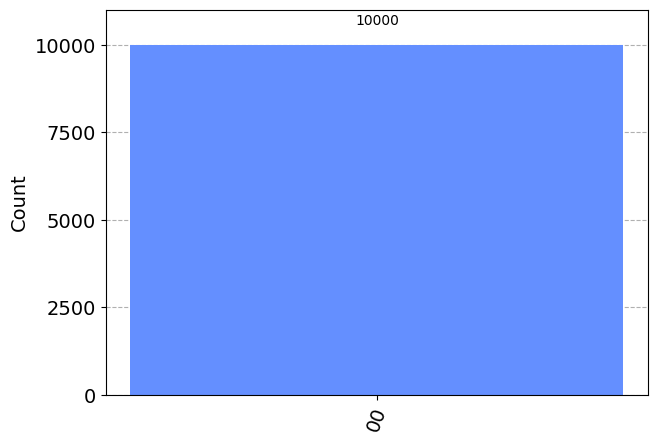

In [38]:
plot_histogram(counts0)

### Si on veut trouver Grimoire 1 (10) : dans 100% des cas on tombe sur ce Grimoire après mésure

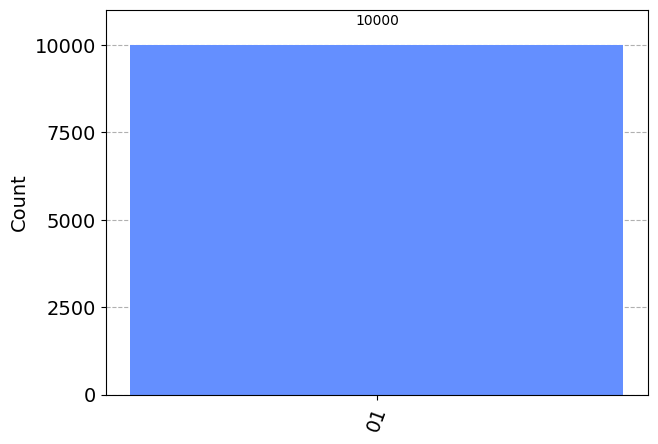

In [39]:
plot_histogram(counts1) # il faut lire les bits de droite à gauche

### Si on veut trouver Grimoire 2 (01) : dans 100% des cas on tombe sur ce Grimoire après mésure

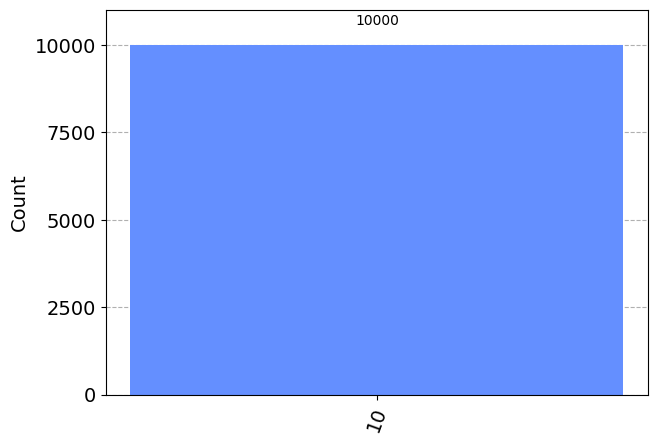

In [40]:
plot_histogram(counts2) # il faut lire les bits de droite à gauche

### Si on veut trouver Grimoire 3 (11) : dans 100% des cas on tombe sur ce Grimoire après mésure

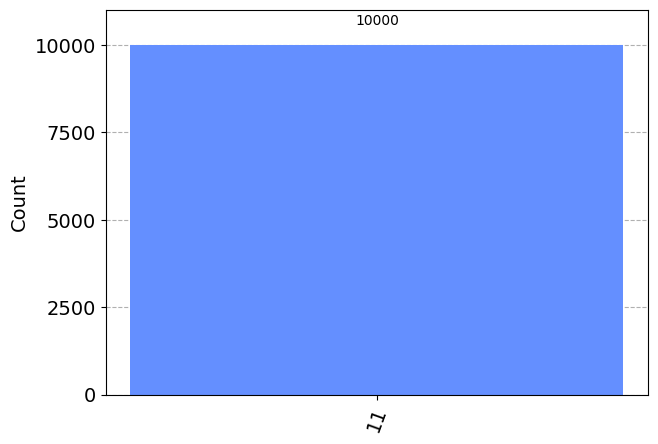

In [41]:
plot_histogram(counts3)